# Homework 2

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

## 2. Hedge Funds.

a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

## 3. The Benchmarks

a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

## 4. The HDG Product

a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

## Answer:

1. 
a. Investing in non-traditional/alternative assets like real estate, commodities, currencies, etc.

b. Alternative strategies like "geared" (leveraged) investing, long/short strategies, etc.

2. 
a. Hedge funds had delivered about 10% higher returns than stocks and more than twice of much as bonds; hedge fund investment returns also had better properties in terms of downside protection

b. Hedge fund has minimum investment requirement, constraints for withdraw, and high management fee.

3. 
a. 

HFRI - Hedge fund Index Series. Index of surveyed hedge funds (2000 Holdings) designed to track the performance of the hedge market as a whole. Monthly returns based on surveys. This can't be launched as an ETF as they need a third party index as benchmark.

MLFM - Index Series created by Merrill Lynch, to replicate the performance of HFRI. Its a linear factor decomposition of the HFRI returns into 6 assets. This is not an asset and not an ETF.

MLFM-ES - MLFM exchange serires, similar to MLFM, but a benchmark to HDG and thus it contains liquid investable assets. It also makes one change in the factors, substituting 6- month Eurodollar deposit yields with US Treasury Bills.

HDG - Actual tradaeble asset trying to track the MLFM-ES, by actually trading on these assets. HDG do not strictly adhere to MLFM-ES replication and would deviate from positions if they can get additional returns or reduce transaction cost.

b. they had a 90\% correlation through 2013.

c. T-Bills

d. Lagging indicator. High inter-correlation.

4. 
a. HDG tracks MLFM-ES Index benchmark. The tracking error is low.

b. HDG may be valuable by delivering complicated or expensive beta to investors. In that sense, a sophisticated "beta" could be valued as "alpha" by investors, especially if delivered in a low-cost ETF.

And even if HDG is delivering only accessible beta, it could be valuable to a portfolio through its ability to diversify against traditional equity and bond allocations, as shown in Exhibit 1 and discussed as a benefit of HFRI. And at ETF fees, this could be an efficient way of loading into these alternative exposures.

c. The gross returns of the underlying assets have a Sharpe Ratio of 0.50. Net of the 1% fee, the net SR for the ETF would then be 9/20 = 0.45. Net of fees, the hedge-fund has 6% excess returns, which leads to a Sharpe Ratio of 6/20 = 0.30.

Of course, this calculation is very simple, but it intends to illustrate that performance is sensitive to the high fees traditionally charged by hedge funds. In the numerical example above, the ETF delivers 90% of the asset-level Sharpe Ratio, while the Hedge Fund delivers 60% of the underlying asset Sharpe Ratio. Thus, though the ETF may miss some of the individual hedge-fund premia, it also has a lower hurdle rate given the lower fees.

***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `Sep 2024`.

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

import sys
import os

relative_path = os.path.join(os.path.dirname('../cmds/'))
sys.path.append(relative_path)

from portfolio import *
from portfolio_management_helper import *

df_series = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'hedge_fund_series')
df_series['Unnamed: 0'] = pd.to_datetime(df_series['Unnamed: 0'])
df_series = df_series.rename(columns = {'Unnamed: 0': 'Date'})

df_series = df_series.set_index('Date')

display(df_series.head(3))

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Date,,,,,
2011-08-31,-0.0321,-0.0256,-0.0257,-0.0270,-0.0065
2011-09-30,-0.0389,-0.0324,-0.0326,-0.0325,-0.0221
2011-10-31,0.0269,0.0436,0.0433,0.0505,0.0252


In [2]:
# def summary_statics(df):
#     result_df = pd.DataFrame()

#     # Month to Annual
#     result_df['Mean'] = df.mean(axis = 0) * 12
#     result_df['Volatility'] = df.std(axis = 0) * np.sqrt(12)
#     result_df['Sharpe ratio'] = result_df['Mean'] / result_df['Volatility']

#     return result_df

# summary_statics(df_series)

In [3]:
# def summary_statics(df):
#     result_df = pd.DataFrame()

#     # Month to Annual
#     result_df['Mean'] = df.mean(axis = 0) * 12
#     result_df['Volatility'] = df.std(axis = 0) * np.sqrt(12)
#     result_df['Sharpe ratio'] = result_df['Mean'] / result_df['Volatility']

#     return result_df

statistics_table = calc_summary_statistics(df_series, annual_factor = 12)
statistics_table[['Annualized Mean', 'Annualized Vol', 'Annualized Sharpe']]

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Annualized Mean,Annualized Vol,Annualized Sharpe
HFRIFWI Index,0.0483,0.0595,0.8120
MLEIFCTR Index,0.0363,0.0561,0.6464
MLEIFCTX Index,0.0346,0.0560,0.6182
HDG US Equity,0.0248,0.0584,0.4248
QAI US Equity,0.0257,0.0500,0.5130


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [4]:
risk_table = calc_summary_statistics(df_series, annual_factor = 12, var_quantile = 0.05)

risk_table[['Skewness', 'Excess Kurtosis', 'Historical VaR (5.00%)', 'Historical CVaR (5.00%)', 
            'Min', 'Max', 'Max Drawdown', 'Peak', 'Bottom', 'Recovery']]

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Skewness,Excess Kurtosis,Historical VaR (5.00%),Historical CVaR (5.00%),Min,Max,Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,-0.9633,5.7631,-0.0243,-0.0375,-0.0908,0.0586,-0.1155,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,-0.2654,1.6316,-0.0282,-0.0359,-0.0532,0.0589,-0.1243,2021-06-30,2022-09-30,2024-02-29
MLEIFCTX Index,-0.2513,1.5959,-0.0281,-0.0358,-0.0524,0.0588,-0.1244,2021-06-30,2022-09-30,2024-02-29
HDG US Equity,-0.2542,1.7593,-0.0309,-0.0376,-0.0592,0.0583,-0.1407,2021-06-30,2022-09-30,2024-07-31
QAI US Equity,-0.4348,1.6059,-0.0179,-0.0327,-0.0563,0.0398,-0.1377,2021-06-30,2022-09-30,2024-02-29


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [5]:
spy_series = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'merrill_factors')
spy_series = spy_series[['Unnamed: 0', 'SPY US Equity']]
spy_series['Unnamed: 0'] = pd.to_datetime(spy_series['Unnamed: 0'])
spy_series = spy_series.rename(columns = {'Unnamed: 0': 'Date'})

spy_series = spy_series.set_index('Date')

display(spy_series.head(5))

,SPY US Equity
Date,
2011-08-31,-0.0550
2011-09-30,-0.0694
2011-10-31,0.1091
2011-11-30,-0.0041
2011-12-31,0.0104


In [6]:
# The length of the two dataframe are the same
len(spy_series) == len(df_series)

def get_ols_metrics(regressors, targets, annualization=1, ignorenan=True):
    # ensure regressors and targets are pandas dataframes, as expected
    if not isinstance(regressors, pd.DataFrame):
        regressors = regressors.to_frame()
    if not isinstance(targets, pd.DataFrame):
        targets = targets.to_frame()

    # align the targets and regressors on the same dates
    df_aligned = targets.join(regressors, how='inner', lsuffix='y ')
    Y = df_aligned[targets.columns]
    Xset = df_aligned[regressors.columns]

    reg = pd.DataFrame(index=targets.columns)
    for col in Y.columns:
        y = Y[col]
        
        if ignorenan:
            # ensure we use only non-NaN dates
            alldata = Xset.join(y,lsuffix='X')
            mask = alldata.notnull().all(axis=1)
            y = y[mask]
            X = Xset[mask]
        else:
            X = Xset

        model = LinearRegression().fit(X, y)
        reg.loc[col, 'alpha'] = model.intercept_ * annualization
        reg.loc[col, 'beta'] = model.coef_
        reg.loc[col, 'r-squared'] = model.score(X, y)

        # sklearn does not return the residuals, so we need to build them
        yfit = model.predict(X)
        residuals = y - yfit

        num_roundoff = 1e-12
        
        # Treynor Ratio is only defined for univariate regression
        if Xset.shape[1] == 1:
            if np.abs(model.coef_) < num_roundoff:
                reg.loc[col,'Treynor Ratio'] = None
            else:
                reg.loc[col,'Treynor Ratio'] = (y.mean() / model.coef_) * annualization

        
        # if intercept =0, numerical roundoff will nonetheless show nonzero Info Ratio        
        if np.abs(model.intercept_) < num_roundoff:
            reg.loc[col, 'Info Ratio'] = None
        else:
            reg.loc[col, 'Info Ratio'] = (model.intercept_ / residuals.std()) * np.sqrt(annualization)

    return reg.values[0]

regress_table = []

for col in df_series:
    regress_table.append(get_ols_metrics(spy_series, df_series[col], annualization = 12))

regress_table = pd.DataFrame(regress_table, index = df_series.columns, columns = ['Alpha', 'Market Beta', 'R-Squared', 'Treynor Ratio', 'Information Ratio'])

regress_table

,Alpha,Market Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,-0.0011,0.3461,0.7115,0.1395,-0.0358
MLEIFCTR Index,-0.0128,0.3434,0.7861,0.1057,-0.4915
MLEIFCTX Index,-0.0143,0.3422,0.7849,0.1011,-0.5495
HDG US Equity,-0.0255,0.3521,0.7632,0.0705,-0.8963
QAI US Equity,-0.0170,0.2984,0.7478,0.0860,-0.6756


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.


### Explanation of Statistics
- Alpha intercept: All alpha intercepts are negative. Alpha shows the excess return of the index relative to its benchmark (SPY) -the portion of the returns that cannot be explained by the independent variable - and here we see that all indices are underperforming SPY relative to what is expected based on the exposure to market risk.
- Beta: Beta coefficient in the Univariate case is just a rescaled covariance (i.e. COV(X,Y) / VAR(X)). It shows how each index behaves for every percentage movement of SPY (the independent variable). It seems that all indices move from 0.3%-0.35% for every 1% movement of SPY, which implies that they are less volatile than the market index.
- Treynor ratio: It is a metric that shows the portfolio's risk-adjusted returns relative to beta. It seems that HFRIFWI Index possesses the highest treynor ratio indicating superior risk adjusted returns compared to the other indices.
- Information ratio: This is the ratio of the alpha intercept to the volatility of residuals. It basically shows the excess performance of the index adjusted for risk. All indices possess negative information ratios which suggests overall poor performance
  

## HDG vs QAI

- HDG has a worse alpha intercept than QAI, so QAI has a better performance in terms of alpha. QAI possesses lower volatility than HDG, higher treynor ratio (which implies better risk adjusted returns) and higher information ratio, thus it dominated HDG in all relevant metrics and thus appears to be a superior choice.


## HDG and ML series don't capture the most notable part of HFRI.

- The evaluation can be made by comparing the positive beta but negative information ratio. When taking away the beta effect, one can see negative information ratio of around -0.9 and -0.5 for HDG and ML series, but the HFRI only has around 0 information ratio. This indicates that HDG and ML fail to proivide sufficient return according to the risk they take.

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

MIN Correlation pair is ('SPY US Equity', 'HFRIFWI Index')
MAX Correlation pair is ('MLEIFCTR Index', 'MLEIFCTX Index')


None

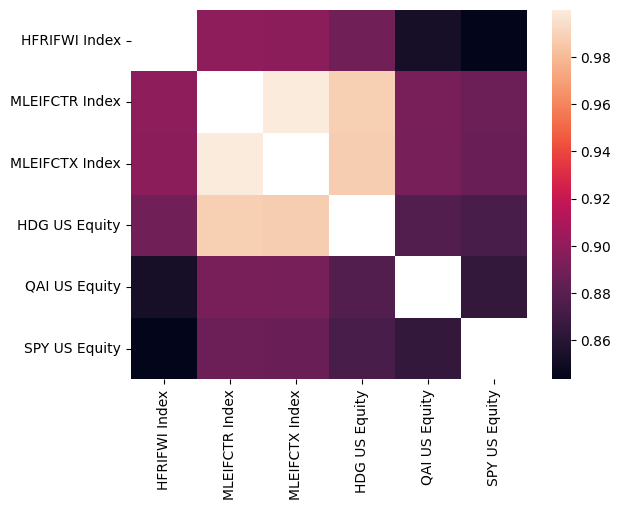

In [7]:
corr_table = display_correlation(pd.concat([df_series, spy_series], axis = 1))

display(corr_table)

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.
b. Are the betas realistic position sizes, or do they require huge long-short positions?
c. Report the R-squared.
d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [8]:
merr_series = pd.read_excel('../data/proshares_analysis_data.xlsx', sheet_name = 'merrill_factors')
merr_series['Unnamed: 0'] = pd.to_datetime(merr_series['Unnamed: 0'])
merr_series = merr_series.rename(columns = {'Unnamed: 0': 'Date'})

merr_series = merr_series.set_index('Date')

display(merr_series.head(3))

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Date,,,,,,
2011-08-31,-0.0550,0.0000,-0.0925,-0.0875,-0.0059,-0.0889
2011-09-30,-0.0694,0.0000,-0.1791,-0.1081,0.1422,-0.1115
2011-10-31,0.1091,-0.0000,0.1630,0.0963,-0.0695,0.1510


In [13]:
def calc_multivariate_regression(y, X, intercept=True, adj=12):
    if intercept:
        X = sm.add_constant(X)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()
    summary = dict()

    inter = results.params.iloc[0] if intercept else 0
    betas = results.params.iloc[1:] if intercept else results.params

    summary["Alpha"] = inter * adj
    summary["R-Squared"] = results.rsquared
    summary['Residual std'] = results.resid.std()

    X_cols = X.columns[1:] if intercept else X.columns

    for i, col in enumerate(X_cols):
        summary[f"{col} Beta"] = betas[i]
    
    return pd.DataFrame(summary, index=y.columns)

regression_result = calc_multivariate_regression(df_series[['HFRIFWI Index']], merr_series)
regression_result

,Alpha,R-Squared,Residual std,SPY US Equity Beta,USGG3M Index Beta,EEM US Equity Beta,EFA US Equity Beta,EUO US Equity Beta,IWM US Equity Beta
HFRIFWI Index,0.0148,0.8397,0.0069,0.0365,0.1463,0.0816,0.0846,0.0288,0.1451


a. From the result, the intercept equals to 0.0148, and the 6 betas are shown in the dataframe

b. The magnitued are not below 1 and no negative, hence without large long/short positions

c. R-squared = 0.8397, which is quite large

d. The volatility of residual = 0.0069

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [14]:
from collections import defaultdict

hfri = df_series[['HFRIFWI Index']].copy()

summary = defaultdict(list)

for idx in range(60, len(hfri)):
    X = merr_series.iloc[idx - 60: idx].copy()
    y = hfri.iloc[idx - 60: idx].copy()

    oos_y = hfri.iloc[idx, 0]
    oos_X = merr_series.iloc[idx, :].copy()

    regr = sm.OLS(y, sm.add_constant(X), missing = 'drop').fit()

    for jdx, coeff in enumerate(regr.params.index):
        summary[coeff].append(regr.params[jdx])
    
    y_pred = regr.params[0] + (regr.params[1:] @ oos_X)

    summary["Replicated"].append(y_pred)
    summary["Actual"].append(oos_y)

summary = pd.DataFrame(summary, index=hfri.index[60:])

OOS-R-Squared: 80.43%


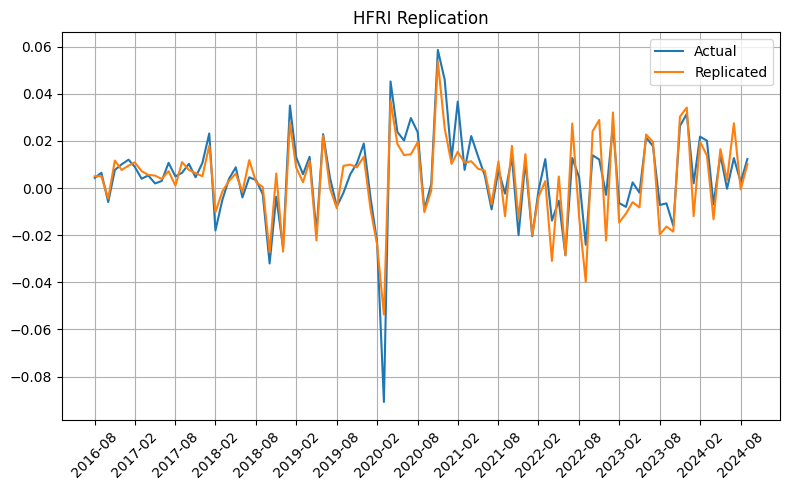

In [15]:
oos_rsquared = (
    1 - (summary["Actual"] - summary["Replicated"]).var() / summary["Actual"].var()
)
print(f"OOS-R-Squared: {oos_rsquared:.2%}")

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(summary.index, summary["Actual"], label="Actual")
ax.plot(summary.index, summary["Replicated"], label="Replicated")
ax.grid(True)
ax.legend()

# Make ticklabels every 6 months and label them as %yyy-%mm
ax.set_xticks(summary.index[::6])
ax.set_xticklabels(
    [f"{i.year}-{i.month:02d}" for i in summary.index[::6]],
    rotation=45,
    horizontalalignment="center",
)

ax.set_title("HFRI Replication")
fig.tight_layout()

Note that the OOS-R-Squared = 0.8080. It is quite good for rolling regression

## 8.

We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [17]:
regression_result_noint = calc_multivariate_regression(df_series[['HFRIFWI Index']], merr_series, intercept = False)
print("Regression with Intercept:")
display(regression_result)

print("Regression without Intercept:")
display(regression_result_noint)

Regression with Intercept:


,Alpha,R-Squared,Residual std,SPY US Equity Beta,USGG3M Index Beta,EEM US Equity Beta,EFA US Equity Beta,EUO US Equity Beta,IWM US Equity Beta
HFRIFWI Index,0.0148,0.8397,0.0069,0.0365,0.1463,0.0816,0.0846,0.0288,0.1451


Regression without Intercept:


,Alpha,R-Squared,Residual std,SPY US Equity Beta,USGG3M Index Beta,EEM US Equity Beta,EFA US Equity Beta,EUO US Equity Beta,IWM US Equity Beta
HFRIFWI Index,0,0.8452,0.0069,0.0507,0.4993,0.0809,0.0791,0.0314,0.1427


In [19]:
regr_int = sm.OLS(hfri, sm.add_constant(merr_series), missing="drop").fit()
regr_no_int = sm.OLS(hfri, merr_series, missing="drop").fit()

fitted_mean = (regr_int.params[0] + regr_int.params[1:] @ merr_series.mean()) * 12
fitted_mean_no_int = (regr_no_int.params @ merr_series.mean()) * 12

hfri_mean = hfri.mean()  * 12

print(f'HFRI Mean: {hfri_mean[0]:.2%}')
print(f'Fitted Mean: {fitted_mean:.2%}')
print(f'Fitted Mean (no intercept): {fitted_mean_no_int:.2%}')

HFRI Mean: 4.83%
Fitted Mean: 4.83%
Fitted Mean (no intercept): 3.95%


- In terms of beta, the coefficient from USGG3M Index Beta is quite different, but others are pretty similar
- The mean of no intercept is lower 
- With intercept should have higher correlation than without intercept as it fits better in terms of R-square
- I think they shouldn't regress with alpha as it is a replication of beta, but not provide additional alpha

***

# 3.  Extensions
<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. 

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

## 2. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

***